# Sequential Flatten + Dense

## 00. Imports

In [1]:
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from sklearn.metrics import confusion_matrix

In [2]:
import sys
sys.path.append("../")

In [3]:
from src.activation.relu import ReluLayer
from src.activation.softmax import SoftmaxLayer
from src.layers.dense import DenseLayer
from src.layers.flatten import FlattenLayer
from src.model.sequential import SequentialModel
from src.utils.core import convert_categorical2one_hot, convert_prob2categorical
from src.utils.metrics import calculate_accuracy

## 01. Settings

In [4]:
# number of samples in the train data set
N_TRAIN_SAMPLES = 5000
# number of samples in the test data set
N_TEST_SAMPLES = 500
# number of samples in the validation data set
N_VALID_SAMPLES = 500
# number of classes
N_CLASSES = 10
# image size
IMAGE_SIZE = 28

## 02. Build data set

In [5]:
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()
print("trainX shape:", trainX.shape)
print("trainY shape:", trainY.shape)
print("testX shape:", testX.shape)
print("testY shape:", testY.shape)

trainX shape: (60000, 28, 28)
trainY shape: (60000,)
testX shape: (10000, 28, 28)
testY shape: (10000,)


In [6]:
X_train = trainX[:N_TRAIN_SAMPLES, :, :]
y_train = trainY[:N_TRAIN_SAMPLES]

X_test = trainX[N_TRAIN_SAMPLES:N_TRAIN_SAMPLES+N_TEST_SAMPLES, :, :]
y_test = trainY[N_TRAIN_SAMPLES:N_TRAIN_SAMPLES+N_TEST_SAMPLES]

X_valid = testX[:N_VALID_SAMPLES, :, :]
y_valid = testY[:N_VALID_SAMPLES]

**NOTE:** We need to change the data format to the shape supported by my implementation.

In [7]:
X_train = np.moveaxis(X_train, 0, -1) / 255
y_train = convert_categorical2one_hot(y_train).T
X_test = np.moveaxis(X_test, 0, -1) / 255
y_test = convert_categorical2one_hot(y_test).T
X_valid = np.moveaxis(X_valid, 0, -1) / 255
y_valid = convert_categorical2one_hot(y_valid).T
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print("X_valid shape:", X_valid.shape)
print("y_valid shape:", y_valid.shape)

X_train shape: (28, 28, 5000)
y_train shape: (10, 5000)
X_test shape: (28, 28, 500)
y_test shape: (10, 500)
X_valid shape: (28, 28, 500)
y_valid shape: (10, 500)


## 03. Build model

In [8]:
layers = [
    FlattenLayer(),
    DenseLayer.initialize(input_dim=IMAGE_SIZE * IMAGE_SIZE, output_dim=1000),
    ReluLayer(),
    DenseLayer.initialize(input_dim=1000, output_dim=1000),
    ReluLayer(),
    DenseLayer.initialize(input_dim=1000, output_dim=500),
    ReluLayer(),
    DenseLayer.initialize(input_dim=500, output_dim=100),
    ReluLayer(),
    DenseLayer.initialize(input_dim=100, output_dim=25),
    ReluLayer(),
    DenseLayer.initialize(input_dim=25, output_dim=N_CLASSES),
    SoftmaxLayer()
]

model = SequentialModel(layers=layers)

## 04. Train

In [9]:
model.train(
    x_train=X_train, 
    y_train=y_train, 
    x_test=X_test, 
    y_test=y_test, 
    epochs=100, 
    lr=0.005
)

Iteration: 00000 - cost: 1.18002 - accuracy: 0.60000
Iteration: 00010 - cost: 0.63659 - accuracy: 0.76400
Iteration: 00020 - cost: 0.61035 - accuracy: 0.79800
Iteration: 00030 - cost: 0.62153 - accuracy: 0.79800
Iteration: 00040 - cost: 0.66457 - accuracy: 0.78600
Iteration: 00050 - cost: 0.71846 - accuracy: 0.79400
Iteration: 00060 - cost: 0.78219 - accuracy: 0.79000
Iteration: 00070 - cost: 0.84012 - accuracy: 0.79600
Iteration: 00080 - cost: 0.89913 - accuracy: 0.79400
Iteration: 00090 - cost: 0.95294 - accuracy: 0.79600
Iteration: 00100 - cost: 0.99767 - accuracy: 0.79600


## 05. Predict and examine results

In [10]:
y_hat = model.predict(X_valid)
acc = calculate_accuracy(y_hat, y_valid)
print("acc: ", acc)

acc:  0.846


In [11]:
y_hat = convert_prob2categorical(y_hat)
y_valid = convert_prob2categorical(y_valid)

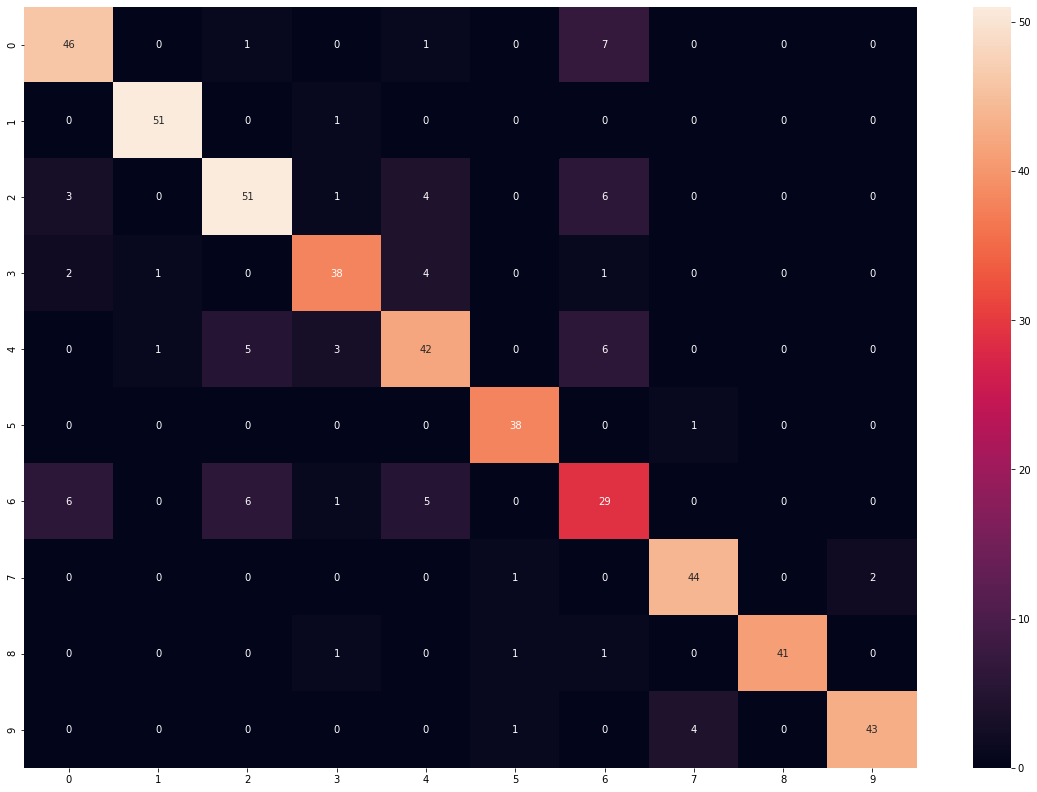

In [12]:
df_cm = pd.DataFrame(
    confusion_matrix(y_valid, y_hat), 
    range(10), 
    range(10)
)
plt.figure(figsize = (20,14))
sn.heatmap(df_cm, annot=True)
plt.show()